# Projet 5 - Produisez une étude de marché

### Votre mission

Pour identifier les pays propices à une insertion dans le marché du poulet, il vous a été demandé de cibler les pays. Il vous faudra également étudier les régimes alimentaires de chaque pays, notamment en termes de protéines d'origine animale et en termes de calories.

Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :

    - différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage;
    
    - proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays;
    
    - disponibilité alimentaire en protéines par habitant;
    
    - disponibilité alimentaire en calories par habitant.

Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 

Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP.

Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :

    - un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale;
    
    - un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

### Livrables


    - Le dendrogramme dans un format image (.png ou .jpg).
    - Le code Python ou R reprenant tous les éléments de l'énoncé.
    - Un fichier CSV contenant la liste des pays ainsi que (pour chacun d'entre eux) leur groupe que vous aurez déterminé après avoir découpé le dendrogramme.
    - Un ficher CSV contenant les centroïdes des groupes et leurs coordonnées dans chacune des dimensions.
    - Une présentation sous forme de slides pour la soutenance.

### Skills

- Construire et lire un dendogramme
- Interpréter une ACP
- Tester l’adéquation à une loi par un test statistique

In [1]:
import pandas as pd 
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import statsmodels.api as sm
import re
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)

1. Explorer les données des tous les fichiers (analyses descriptives (ex: mean), visualizations)
2. Nettoyage
3. Avoir que des données numérqiues
4. Normaliser tes données numériques (Stardization or normalization or Min Max)
5. Train cluster et évaluation du nombre de k (sélectionner le nombre de cluters)

### Etape 1 - Construisez l'échantillon contenant l'ensemble des pays disponibles:

#### 1. Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage

In [2]:
# Pour encoding
df = pd.read_csv('FAO_Population.csv',header=0, sep=",", decimal =".",encoding="latin1")

In [3]:
df_pop = pd.read_csv('FAO_Population.csv')
df_pop.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,34413.603,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,55386.367,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792.518,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,2890.513,X,Sources internationales sûres,NaN


In [4]:
# Exploratory Data Analysis
EDA = pd.DataFrame(columns = ['Columns','Types','Values', 'Uniques', 'Uniques(no nulls)', 'Missing(n)', 'Missing(%)'])
eda = pd.DataFrame()

for c in df_pop.columns:
    eda['Columns'] = [c]
    eda['Types'] = df_pop[c].dtypes
    eda['Values'] = [df_pop[c].unique()]
    eda['Uniques'] = len(list(df_pop[c].unique()))
    eda['Uniques(no nulls)'] = int(df_pop[c].nunique())
    eda['Missing(n)'] = df_pop[c].isnull().sum()
    eda['Missing(%)'] = (df_pop[c].isnull().sum()/ len(df_pop)).round(3)*100
    EDA = EDA.append(eda)
EDA

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,Code Domaine,object,[OA],1,1,0,0.0
0,Domaine,object,[Séries temporelles annuelles],1,1,0,0.0
0,Code zone (FAO),int64,"[2, 202, 3, 4, 79, 6, 7, 258, 8, 151, 194, 9, ...",237,237,0,0.0
0,Zone,object,"[Afghanistan, Afrique du Sud, Albanie, Algérie...",237,237,0,0.0
0,Code Élément,int64,[511],1,1,0,0.0
0,Élément,object,[Population totale],1,1,0,0.0
0,Code Produit,int64,[3010],1,1,0,0.0
0,Produit,object,[Population-Estimations],1,1,0,0.0
0,Code année,int64,"[2015, 2018]",2,2,0,0.0
0,Année,int64,"[2015, 2018]",2,2,0,0.0


In [5]:
# il y a des doublons de valeur de la Chine.
df_pop = df_pop[(df_pop.Symbole != 'A')]
df_pop.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,34413.603,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,55386.367,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792.518,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,2890.513,X,Sources internationales sûres,NaN


In [6]:
df_pop = df_pop[['Code zone (FAO)','Zone','Produit','Année','Valeur']]
df_pop['Valeur']*=1000

In [7]:
df_pop = df_pop.pivot_table(index = ['Code zone (FAO)','Zone','Produit'], 
                            columns ='Année',values ='Valeur',aggfunc = sum).reset_index()

In [8]:
# différence de population entre 2015 et 2018 en pourcentage
df_pop['Evolution pop (%)']=round(((df_pop[2018]-df_pop[2015])/df_pop[2015]*100),3)

In [9]:
df_pop.head()

Année,Code zone (FAO),Zone,Produit,2015,2018,Evolution pop (%)
0,1,Arménie,Population-Estimations,2925553.0,2951745.0,0.895
1,2,Afghanistan,Population-Estimations,34413603.0,37171921.0,8.015
2,3,Albanie,Population-Estimations,2890513.0,2882740.0,-0.269
3,4,Algérie,Population-Estimations,39728025.0,42228408.0,6.294
4,5,Samoa américaines,Population-Estimations,55812.0,55465.0,-0.622


In [10]:
pop2015 = df_pop[2015].sum()
pop2018 = df_pop[2018].sum()
evolution_globale = round ((pop2018 - pop2015)/pop2015 *100,3)
print('La population totale en 2015 était de', '{:,}'.format(pop2015).replace(',',' '))
print('La population totale en 2018 était de', '{:,}'.format(pop2018).replace(',',' '))
print('Evolution globale de la population de 2015/2018 est de','{:,}'.format(evolution_globale).replace(',',' '),'%')

La population totale en 2015 était de 7 379 797 139.0
La population totale en 2018 était de 7 631 091 040.0
Evolution globale de la population de 2015/2018 est de 3.405 %


#### 2. Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays 2018

In [11]:
df_dispo_alim = pd.read_csv('FAO_Disponibilité_alimentaire.csv',header=0, sep=",", decimal =".")
df_dispo_alim.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2018,2018,Kcal/personne/jour,2040.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2018,2018,g/personne/jour,55.52,Fc,Donnée calculée
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,684,Disponibilité de matière grasse en quantité (g...,2901,Total General,2018,2018,g/personne/jour,31.91,Fc,Donnée calculée
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2941,Produits Animaux,2018,2018,Kcal/personne/jour,191.00,Fc,Donnée calculée
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2018,2018,g/personne/jour,10.79,Fc,Donnée calculée


In [12]:
# Exploratory Data Analysis
EDA = pd.DataFrame(columns = ['Columns','Types','Values', 'Uniques', 'Uniques(no nulls)', 'Missing(n)', 'Missing(%)'])
eda = pd.DataFrame()

for c in df_dispo_alim.columns:
    eda['Columns'] = [c]
    eda['Types'] = df_dispo_alim[c].dtypes
    eda['Values'] = [df_dispo_alim[c].unique()]
    eda['Uniques'] = len(list(df_dispo_alim[c].unique()))
    eda['Uniques(no nulls)'] = int(df_dispo_alim[c].nunique())
    eda['Missing(n)'] = df_dispo_alim[c].isnull().sum()
    eda['Missing(%)'] = (df_dispo_alim[c].isnull().sum()/ len(df_dispo_alim)).round(3)*100
    EDA = EDA.append(eda)
EDA

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,Code Domaine,object,[FBS],1,1,0,0.0
0,Domaine,object,[Bilans Alimentaires (2014-)],1,1,0,0.0
0,Code zone (FAO),int64,"[2, 202, 3, 4, 79, 7, 8, 194, 9, 1, 10, 11, 52...",173,173,0,0.0
0,Zone,object,"[Afghanistan, Afrique du Sud, Albanie, Algérie...",173,173,0,0.0
0,Code Élément,int64,"[664, 674, 684]",3,3,0,0.0
0,Élément,object,[Disponibilité alimentaire (Kcal/personne/jour...,3,3,0,0.0
0,Code Produit,int64,"[2901, 2941]",2,2,0,0.0
0,Produit,object,"[Total General, Produits Animaux]",2,2,0,0.0
0,Code année,int64,[2018],1,1,0,0.0
0,Année,int64,[2018],1,1,0,0.0


In [13]:
df_dispo_alim = df_dispo_alim[['Code zone (FAO)','Zone','Élément','Produit','Année','Valeur','Unité']]
df_dispo_alim.head()

,Code zone (FAO),Zone,Élément,Produit,Année,Valeur,Unité
0,2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Total General,2018,2040.00,Kcal/personne/jour
1,2,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Total General,2018,55.52,g/personne/jour
2,2,Afghanistan,Disponibilité de matière grasse en quantité (g...,Total General,2018,31.91,g/personne/jour
3,2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Produits Animaux,2018,191.00,Kcal/personne/jour
4,2,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Produits Animaux,2018,10.79,g/personne/jour


In [14]:
df_dispo_alim = df_dispo_alim.pivot_table(index = ['Code zone (FAO)','Zone','Année'], 
                            columns =['Élément','Produit'],
                            values ='Valeur',
                            aggfunc = sum).reset_index()
df_dispo_alim.head()

Élément Code zone (FAO)         Zone Année  \
Produit                                      
0                     1      Arménie  2018   
1                     2  Afghanistan  2018   
2                     3      Albanie  2018   
3                     4      Algérie  2018   
4                     7       Angola  2018   

Élément Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                               Produits Animaux Total General   
0                                                795.0        2997.0   
1                                                191.0        2040.0   
2                                               1003.0        3360.0   
3                                                390.0        3322.0   
4                                                208.0        2385.0   

Élément Disponibilité de matière grasse en quantité (g/personne/jour)  \
Produit                                              Produits Animaux   
0                                                    57.26              
1                                                    13.30              
2                                                    68.04              
3                                                    22.71              
4                                                    14.49              

Élément                \
Produit Total General   
0               95.69   
1               31.91   
2              116.75   
3               77.28   
4               57.73   

Élément Disponibilité de protéines en quantité (g/personne/jour)                
Produit                                         Produits Animaux Total General  
0                                                    45.34               94.35  
1                                                    10.79               55.52  
2                                                    61.75              115.74  
3                                                    24.73               91.83  
4                                                    16.31               53.05

In [15]:
df_dispo_alim_pop = pd.merge(df_pop,df_dispo_alim,on='Code zone (FAO)')
df_dispo_alim_pop.head()

,Code zone (FAO),Zone,Produit,2015,2018,Evolution pop (%),"(Zone, )","(Année, )","(Disponibilité alimentaire (Kcal/personne/jour), Produits Animaux)","(Disponibilité alimentaire (Kcal/personne/jour), Total General)","(Disponibilité de matière grasse en quantité (g/personne/jour), Produits Animaux)","(Disponibilité de matière grasse en quantité (g/personne/jour), Total General)","(Disponibilité de protéines en quantité (g/personne/jour), Produits Animaux)","(Disponibilité de protéines en quantité (g/personne/jour), Total General)"
0,1,Arménie,Population-Estimations,2925553.0,2951745.0,0.895,Arménie,2018,795.0,2997.0,57.26,95.69,45.34,94.35
1,2,Afghanistan,Population-Estimations,34413603.0,37171921.0,8.015,Afghanistan,2018,191.0,2040.0,13.30,31.91,10.79,55.52
2,3,Albanie,Population-Estimations,2890513.0,2882740.0,-0.269,Albanie,2018,1003.0,3360.0,68.04,116.75,61.75,115.74
3,4,Algérie,Population-Estimations,39728025.0,42228408.0,6.294,Algérie,2018,390.0,3322.0,22.71,77.28,24.73,91.83
4,7,Angola,Population-Estimations,27884381.0,30809787.0,10.491,Angola,2018,208.0,2385.0,14.49,57.73,16.31,53.05


In [16]:
df_dispo_alim_pop = df_dispo_alim_pop.rename(columns={'Code zone (FAO)': 'Code zone',
                                                      ('Zone',''): 'Zone',
                                                      ('Année',''): 'Année',
                                                      ('Disponibilité alimentaire (Kcal/personne/jour)', 'Produits Animaux'): 'Dispo_alim_anim(kcal/p/j)',
                                                      ('Disponibilité alimentaire (Kcal/personne/jour)', 'Total General'):'Dispo_alim_total(kcal/p/j)',
                                                      ('Disponibilité de matière grasse en quantité (g/personne/jour)', 'Produits Animaux'):'Dispo_grasse_anim(g/p/j)',
                                                      ('Disponibilité de matière grasse en quantité (g/personne/jour)', 'Total General'):'Dispo_grasse_total(g/p/j)',
                                                      ('Disponibilité de protéines en quantité (g/personne/jour)', 'Produits Animaux'):'Dispo_prot_anim(g/p/j)',
                                                      ('Disponibilité de protéines en quantité (g/personne/jour)', 'Total General'):'Dispo_prot_total(g/p/j)'})
df_dispo_alim_pop.head()

,Code zone,Zone,Produit,2015,2018,Evolution pop (%),Zone,Année,Dispo_alim_anim(kcal/p/j),Dispo_alim_total(kcal/p/j),Dispo_grasse_anim(g/p/j),Dispo_grasse_total(g/p/j),Dispo_prot_anim(g/p/j),Dispo_prot_total(g/p/j)
0,1,Arménie,Population-Estimations,2925553.0,2951745.0,0.895,Arménie,2018,795.0,2997.0,57.26,95.69,45.34,94.35
1,2,Afghanistan,Population-Estimations,34413603.0,37171921.0,8.015,Afghanistan,2018,191.0,2040.0,13.30,31.91,10.79,55.52
2,3,Albanie,Population-Estimations,2890513.0,2882740.0,-0.269,Albanie,2018,1003.0,3360.0,68.04,116.75,61.75,115.74
3,4,Algérie,Population-Estimations,39728025.0,42228408.0,6.294,Algérie,2018,390.0,3322.0,22.71,77.28,24.73,91.83
4,7,Angola,Population-Estimations,27884381.0,30809787.0,10.491,Angola,2018,208.0,2385.0,14.49,57.73,16.31,53.05


In [17]:
df_dispo_alim_pop = df_dispo_alim_pop.loc[:,~df_dispo_alim_pop.columns.duplicated()]
df_dispo_alim_pop.head()

,Code zone,Zone,Produit,2015,2018,Evolution pop (%),Année,Dispo_alim_anim(kcal/p/j),Dispo_alim_total(kcal/p/j),Dispo_grasse_anim(g/p/j),Dispo_grasse_total(g/p/j),Dispo_prot_anim(g/p/j),Dispo_prot_total(g/p/j)
0,1,Arménie,Population-Estimations,2925553.0,2951745.0,0.895,2018,795.0,2997.0,57.26,95.69,45.34,94.35
1,2,Afghanistan,Population-Estimations,34413603.0,37171921.0,8.015,2018,191.0,2040.0,13.30,31.91,10.79,55.52
2,3,Albanie,Population-Estimations,2890513.0,2882740.0,-0.269,2018,1003.0,3360.0,68.04,116.75,61.75,115.74
3,4,Algérie,Population-Estimations,39728025.0,42228408.0,6.294,2018,390.0,3322.0,22.71,77.28,24.73,91.83
4,7,Angola,Population-Estimations,27884381.0,30809787.0,10.491,2018,208.0,2385.0,14.49,57.73,16.31,53.05


In [18]:
df_dispo_alim_pop[2018].sum()

7448056479.0

In [19]:
df_dispo_alim_pop["Prot_anim/Prot_totale(%)"] = round((df_dispo_alim_pop['Dispo_prot_anim(g/p/j)']
                                                       /df_dispo_alim_pop['Dispo_prot_total(g/p/j)'])*100,3)
df_dispo_alim_pop.head()

,Code zone,Zone,Produit,2015,2018,Evolution pop (%),Année,Dispo_alim_anim(kcal/p/j),Dispo_alim_total(kcal/p/j),Dispo_grasse_anim(g/p/j),Dispo_grasse_total(g/p/j),Dispo_prot_anim(g/p/j),Dispo_prot_total(g/p/j),Prot_anim/Prot_totale(%)
0,1,Arménie,Population-Estimations,2925553.0,2951745.0,0.895,2018,795.0,2997.0,57.26,95.69,45.34,94.35,48.055
1,2,Afghanistan,Population-Estimations,34413603.0,37171921.0,8.015,2018,191.0,2040.0,13.30,31.91,10.79,55.52,19.434
2,3,Albanie,Population-Estimations,2890513.0,2882740.0,-0.269,2018,1003.0,3360.0,68.04,116.75,61.75,115.74,53.352
3,4,Algérie,Population-Estimations,39728025.0,42228408.0,6.294,2018,390.0,3322.0,22.71,77.28,24.73,91.83,26.930
4,7,Angola,Population-Estimations,27884381.0,30809787.0,10.491,2018,208.0,2385.0,14.49,57.73,16.31,53.05,30.745


##### 3. Disponibilité alimentaire en protéines par habitant et en calories par habitant.

In [20]:
df_dispo_alim_prot_habit = df_dispo_alim_pop [["Code zone","Zone","Année",2018,"Evolution pop (%)",
                                              "Dispo_alim_total(kcal/p/j)","Dispo_prot_total(g/p/j)",
                                              "Prot_anim/Prot_totale(%)"]]
df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"]= df_dispo_alim_prot_habit["Dispo_alim_total(kcal/p/j)"]*365
df_dispo_alim_prot_habit["Dispo_prot(g/p)"]= df_dispo_alim_prot_habit["Dispo_prot_total(g/p/j)"]*365

In [21]:
df_dispo_alim_prot_habit.head()

,Code zone,Zone,Année,2018,Evolution pop (%),Dispo_alim_total(kcal/p/j),Dispo_prot_total(g/p/j),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p)
0,1,Arménie,2018,2951745.0,0.895,2997.0,94.35,48.055,1093905.0,34437.75
1,2,Afghanistan,2018,37171921.0,8.015,2040.0,55.52,19.434,744600.0,20264.80
2,3,Albanie,2018,2882740.0,-0.269,3360.0,115.74,53.352,1226400.0,42245.10
3,4,Algérie,2018,42228408.0,6.294,3322.0,91.83,26.930,1212530.0,33517.95
4,7,Angola,2018,30809787.0,10.491,2385.0,53.05,30.745,870525.0,19363.25


In [22]:
# Exploratory Data Analysis
EDA = pd.DataFrame(columns = ['Columns','Types','Values', 'Uniques', 'Uniques(no nulls)', 'Missing(n)', 'Missing(%)'])
eda = pd.DataFrame()

for c in df_dispo_alim_prot_habit.columns:
    eda['Columns'] = [c]
    eda['Types'] = df_dispo_alim_prot_habit[c].dtypes
    eda['Values'] = [df_dispo_alim_prot_habit[c].unique()]
    eda['Uniques'] = len(list(df_dispo_alim_prot_habit[c].unique()))
    eda['Uniques(no nulls)'] = int(df_dispo_alim_prot_habit[c].nunique())
    eda['Missing(n)'] = df_dispo_alim_prot_habit[c].isnull().sum()
    eda['Missing(%)'] = (df_dispo_alim_prot_habit[c].isnull().sum()/ len(df_dispo_alim_prot_habit)).round(3)*100
    EDA = EDA.append(eda)
EDA

,Columns,Types,Values,Uniques,Uniques(no nulls),Missing(n),Missing(%)
0,Code zone,int64,"[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 14, 16, 19, ...",172,172,0,0.0
0,Zone,object,"[Arménie, Afghanistan, Albanie, Algérie, Angol...",172,172,0,0.0
0,Année,int64,[2018],1,1,0,0.0
0,2018,float64,"[2951745.0, 37171921.0, 2882740.0, 42228408.0,...",172,172,0,0.0
0,Evolution pop (%),float64,"[0.895, 8.015, -0.269, 6.294, 10.491, 2.907, 2...",170,170,0,0.0
0,Dispo_alim_total(kcal/p/j),float64,"[2997.0, 2040.0, 3360.0, 3322.0, 2385.0, 2445....",160,160,0,0.0
0,Dispo_prot_total(g/p/j),float64,"[94.35, 55.52, 115.74, 91.83, 53.05, 80.19, 10...",171,171,0,0.0
0,Prot_anim/Prot_totale(%),float64,"[48.055, 19.434, 53.352, 26.93, 30.745, 64.522...",170,170,0,0.0
0,Dispo_alim(kcal/p),float64,"[1093905.0, 744600.0, 1226400.0, 1212530.0, 87...",160,160,0,0.0
0,Dispo_prot(g/p),float64,"[34437.75, 20264.800000000003, 42245.1, 33517....",171,171,0,0.0


In [23]:
import statsmodels.api as sm
Y = df_dispo_alim_prot_habit['Dispo_alim(kcal/p)']
X = df_dispo_alim_prot_habit[['Evolution pop (%)']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['Evolution pop (%)'],result.params['intercept']

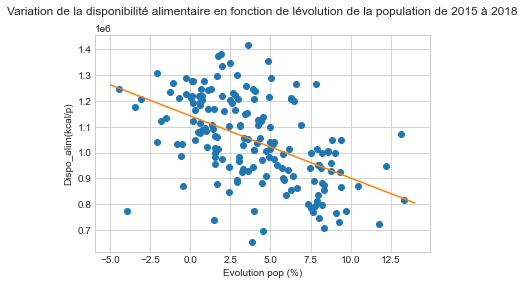

In [24]:
plt.plot(df_dispo_alim_prot_habit["Evolution pop (%)"],df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"], "o")
plt.plot(np.arange(-5,15),[a*x+b for x in np.arange(-5,15)])
plt.xlabel("Evolution pop (%)")
plt.ylabel("Dispo_alim(kcal/p)")
plt.title('Variation de la disponibilité alimentaire en fonction de lévolution de la population de 2015 à 2018',
         loc ='center',fontsize = 12, pad=20)
plt.show()

In [25]:
a,b

(-24082.704510658914, 1142337.090582767)

In [26]:
# Corrélation linéaire (Pearson)
r = st.pearsonr(df_dispo_alim_prot_habit["Evolution pop (%)"],df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"])[0]
r

-0.503989560695714

Il y a une corrélation négative entre "Evolution pop(%)" et "Dispo_alim (kcal/p)".

Analyse de la distribution disponiblité alimentation par habitant en 2018:

minimum: 651890.0
maximum: 1418025.0
moyen: 1048632.2674418604
median: 1042257.5
mode: 0    1207055.0
dtype: float64
var: 27485682119.56801
std_var: 165788.06386337953
skw: -0.11305866139049216
kur: -0.6973046001317122


<Figure size 432x288 with 0 Axes>

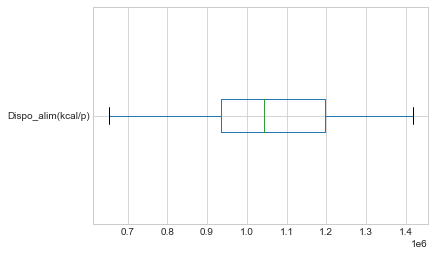

<Figure size 432x288 with 0 Axes>

In [27]:
# Loi Normale
print("Analyse de la distribution disponiblité alimentation par habitant en 2018:\n")
print("minimum:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].min())
print("maximum:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].max())
print("moyen:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].mean())
print("median:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].median())
print("mode:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].mode())
print("var:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].var(ddof=0))
print("std_var:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].std(ddof=0))
print("skw:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].skew())
print("kur:",df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"].kurtosis())

df_dispo_alim_prot_habit.boxplot(column="Dispo_alim(kcal/p)", vert=False)
plt.figure()

Text(0.5, 1.0, 'Distribution disponibilité alimentation par habitant en 2018')

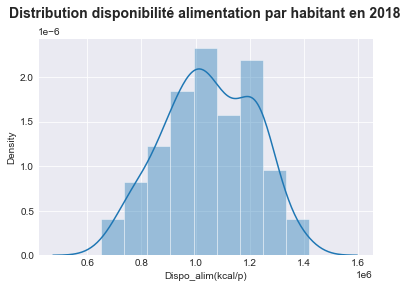

In [28]:
sns.set_style('darkgrid')
sns.distplot(df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"])
plt.title("Distribution disponibilité alimentation par habitant en 2018", fontsize=14, fontweight='bold',pad=20)

In [29]:
# Le test de Kolmogorov Smirnov pour les variable continue
st.ks_2samp(df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"],
            list(np.random.normal(np.mean(df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"]), 
                                  np.std(df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"]), 1000)))

KstestResult(statistic=0.07144186046511627, pvalue=0.42009000946469643)

P-value signifie le degré de significativité, exprimée en pourcentage.

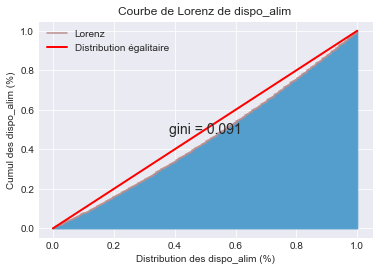

L'indice de Gini de dispo_alim est de: 0.09050001294212051


In [30]:
# Courbe de Lorenz sur la disponibilité alimentaire

dispo_alim = df_dispo_alim_prot_habit["Dispo_alim(kcal/p)"]
# Sélection du sous-échantillon de travail que l'on appelle dispo_alim

n = len(dispo_alim)
#On place les observations dans une variable
lorenz_dispo_alim = np.cumsum(np.sort(dispo_alim)) / dispo_alim.sum()


# L'indice de Gini
AUC = (lorenz_dispo_alim.sum() -lorenz_dispo_alim[-1]/2 -lorenz_dispo_alim[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S

#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
plt.plot(np.linspace(0,1,len(lorenz_dispo_alim)), lorenz_dispo_alim, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_dispo_alim)) ,lorenz_dispo_alim, color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')

plt.title('Courbe de Lorenz de dispo_alim')
plt.xlabel("Distribution des dispo_alim (%)")
plt.ylabel("Cumul des dispo_alim (%)")
plt.text(0.5,0.5,('gini = '+ str(round(gini,3))),horizontalalignment='center',
     verticalalignment='center', fontsize=14)

plt.legend(loc="best")
plt.show()

print("L\'indice de Gini de dispo_alim est de:",gini)

On remarque aue l'indice de Gini est de 0.091 et la répartition de la disponibilité alimentaire est plutôt égalitaire.

### Etape 2 - Construisez un dendrogramme contenant l'ensemble des pays étudiés, puis coupez-le afin d'obtenir 5 groupes.

In [31]:
df_dispo_alim_prot_habit.head()

,Code zone,Zone,Année,2018,Evolution pop (%),Dispo_alim_total(kcal/p/j),Dispo_prot_total(g/p/j),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p)
0,1,Arménie,2018,2951745.0,0.895,2997.0,94.35,48.055,1093905.0,34437.75
1,2,Afghanistan,2018,37171921.0,8.015,2040.0,55.52,19.434,744600.0,20264.80
2,3,Albanie,2018,2882740.0,-0.269,3360.0,115.74,53.352,1226400.0,42245.10
3,4,Algérie,2018,42228408.0,6.294,3322.0,91.83,26.930,1212530.0,33517.95
4,7,Angola,2018,30809787.0,10.491,2385.0,53.05,30.745,870525.0,19363.25


In [32]:
df_bilans_pays = df_dispo_alim_prot_habit.drop(['Dispo_alim_total(kcal/p/j)', 
                                                'Dispo_prot_total(g/p/j)'], axis = 1)
df_bilans_pays = df_bilans_pays.rename(columns={2018:'Population'})
df_bilans_pays.index = df_bilans_pays['Zone']
df_bilans_pays = df_bilans_pays.drop(['Zone'], axis = 1)

df_bilans_pays.head()

,Code zone,Année,Population,Evolution pop (%),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p)
Zone,,,,,,,
Arménie,1,2018,2951745.0,0.895,48.055,1093905.0,34437.75
Afghanistan,2,2018,37171921.0,8.015,19.434,744600.0,20264.80
Albanie,3,2018,2882740.0,-0.269,53.352,1226400.0,42245.10
Algérie,4,2018,42228408.0,6.294,26.930,1212530.0,33517.95
Angola,7,2018,30809787.0,10.491,30.745,870525.0,19363.25


In [33]:
print(df_bilans_pays.shape)

(172, 7)


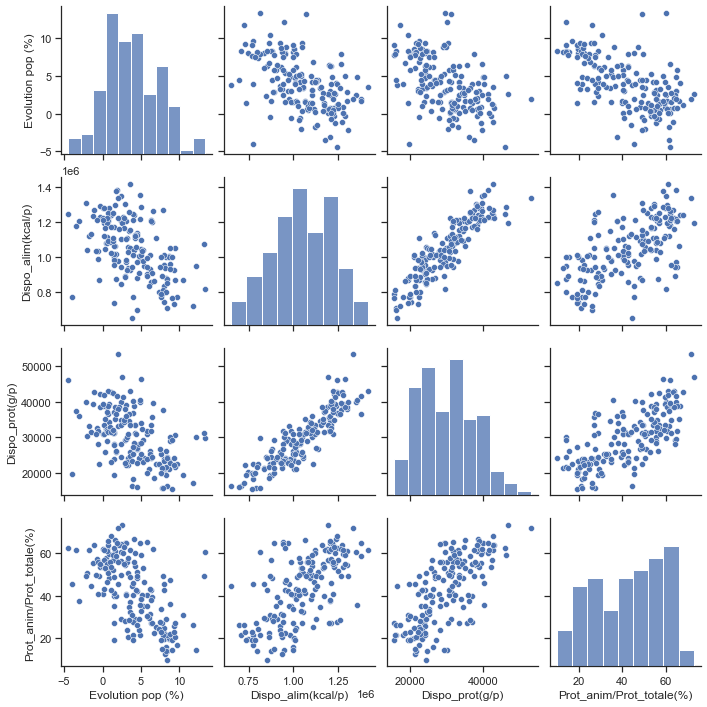

In [34]:
# Pairplot les variables du dataset 2 à 2
sns.set(style = 'ticks')
sns.pairplot(df_bilans_pays[['Evolution pop (%)','Dispo_alim(kcal/p)',
                             'Dispo_prot(g/p)','Prot_anim/Prot_totale(%)']])

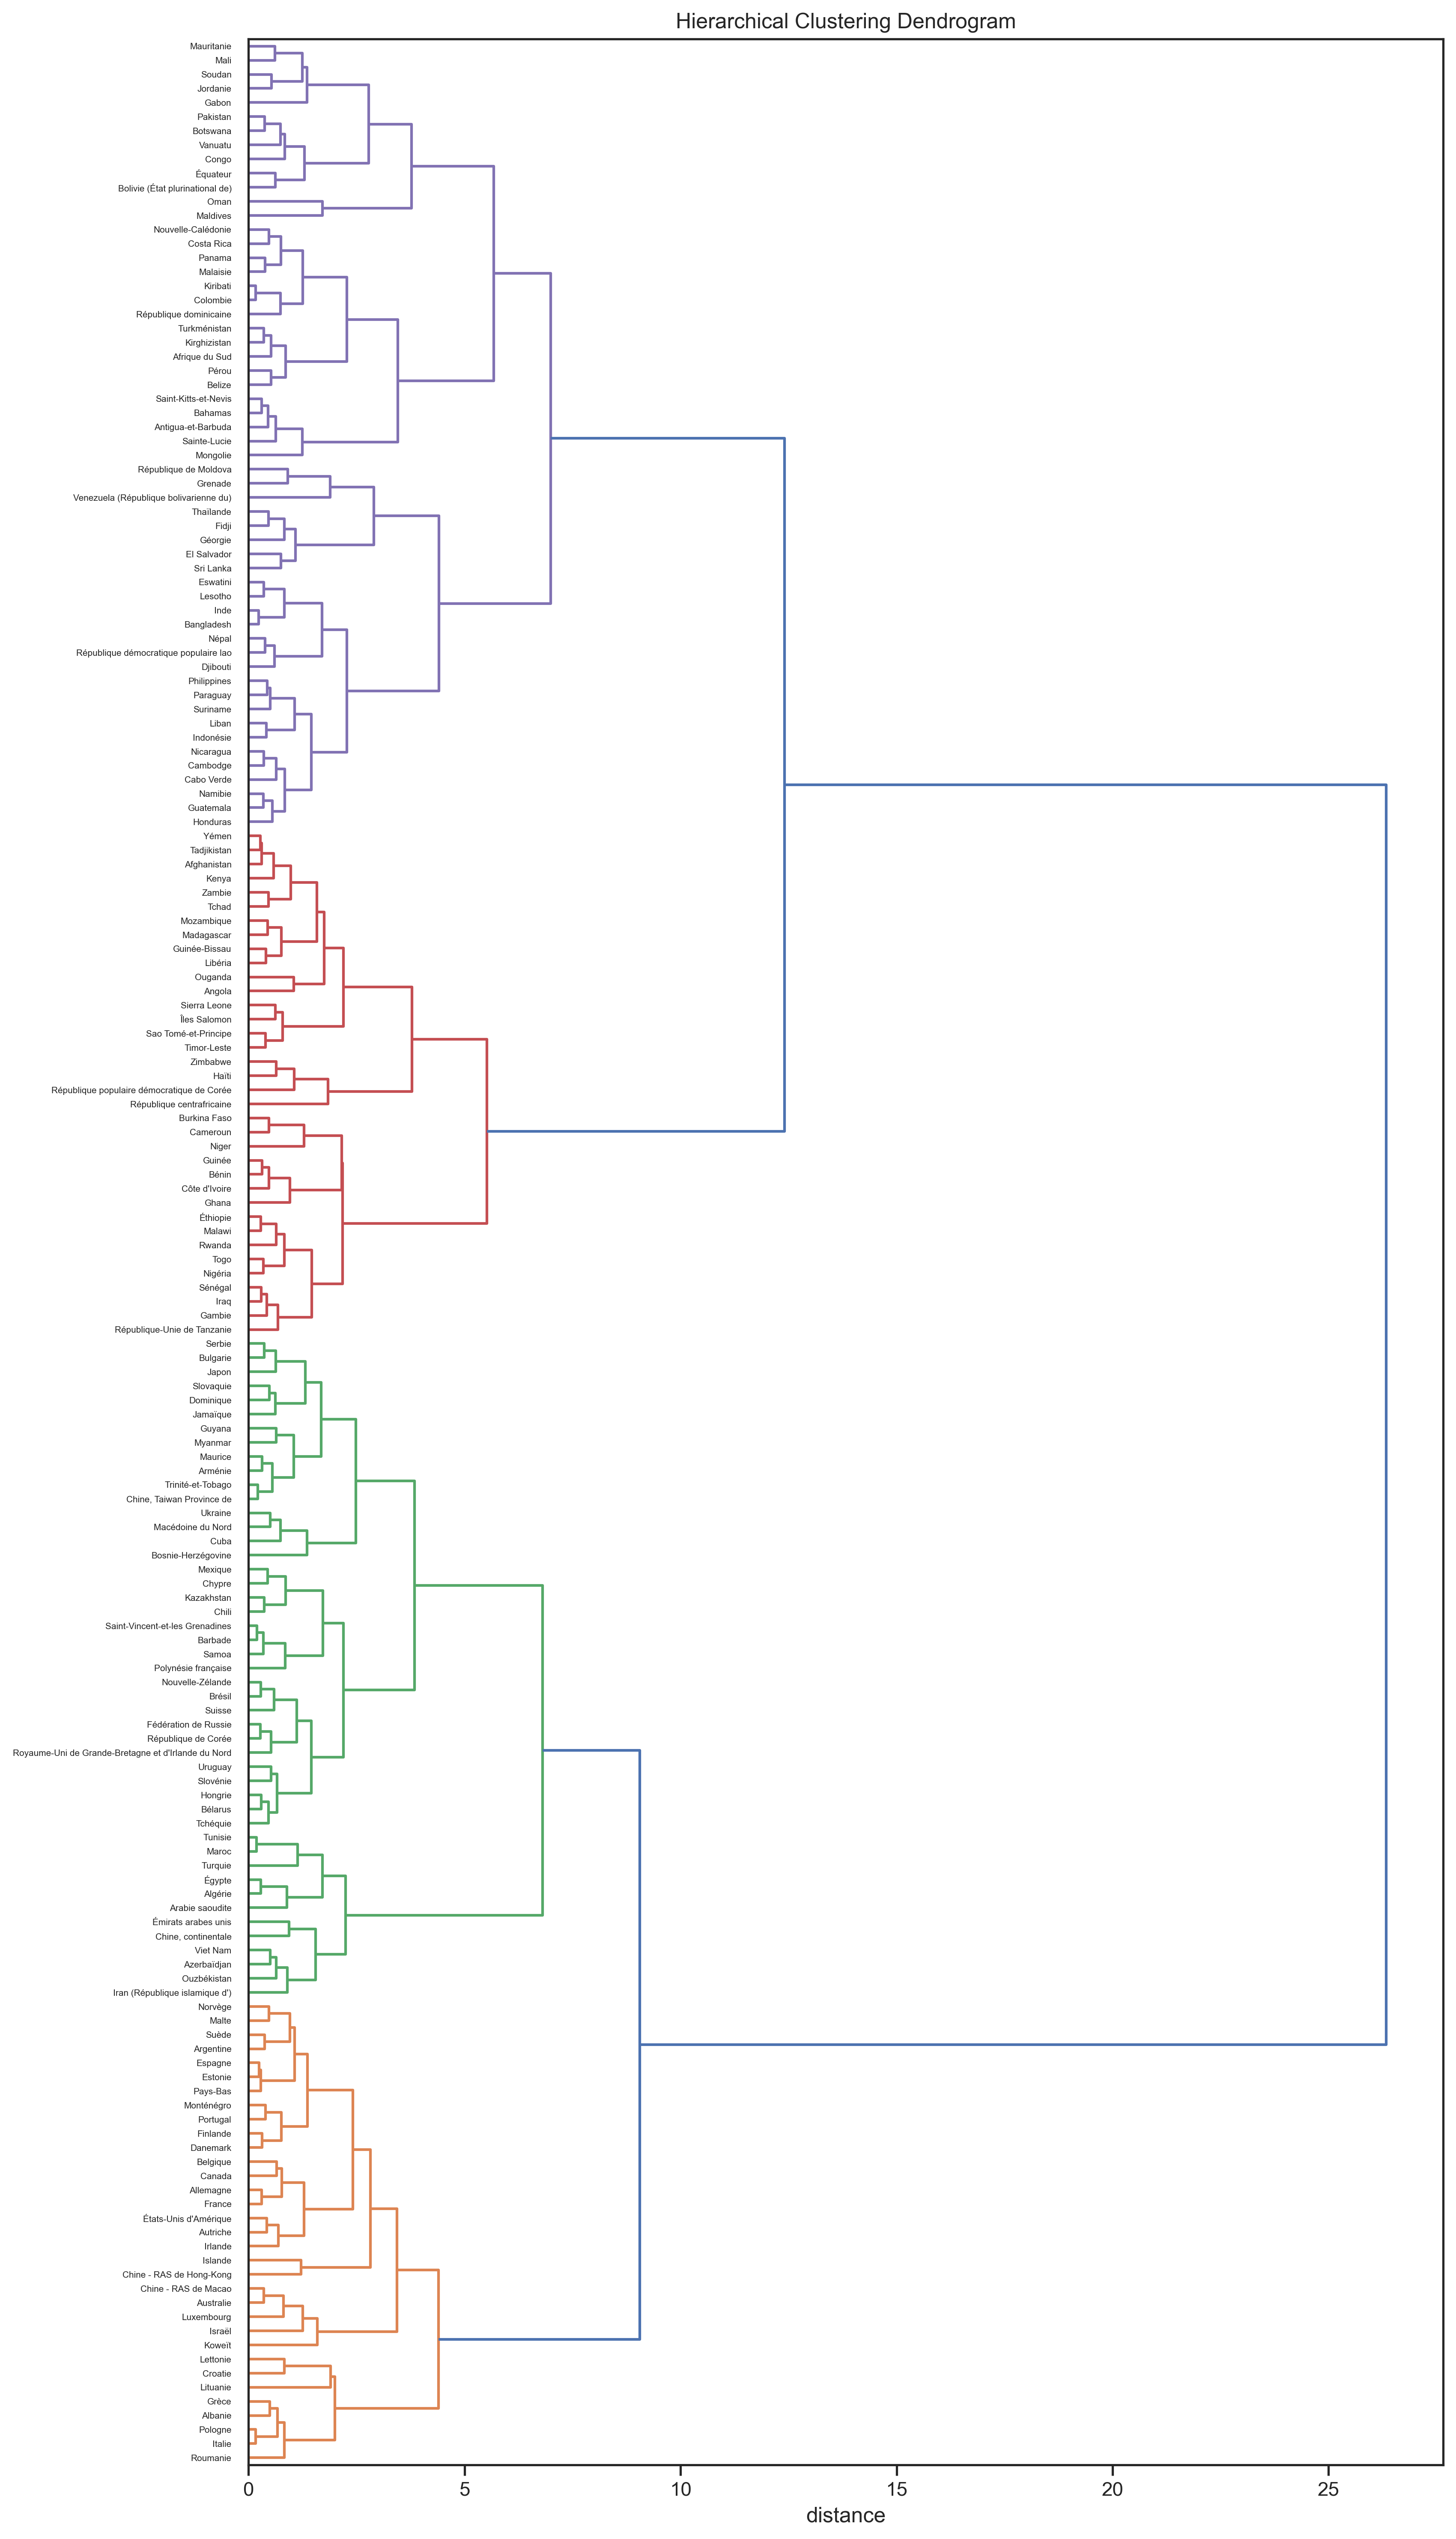

In [35]:
# Préparation des données pour le clustering
df_bilans_pays_clus = df_bilans_pays[['Evolution pop (%)','Dispo_alim(kcal/p)',
                                      'Dispo_prot(g/p)','Prot_anim/Prot_totale(%)']]

X = df_bilans_pays_clus.values
pays = df_bilans_pays_clus.index

# Centrage et Réduction
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
from scipy.cluster.hierarchy import linkage, fcluster
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,25), dpi=300)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
dendrogram(
    Z,
    labels = pays,
    orientation = "right",
    color_threshold=7
)
plt.show()

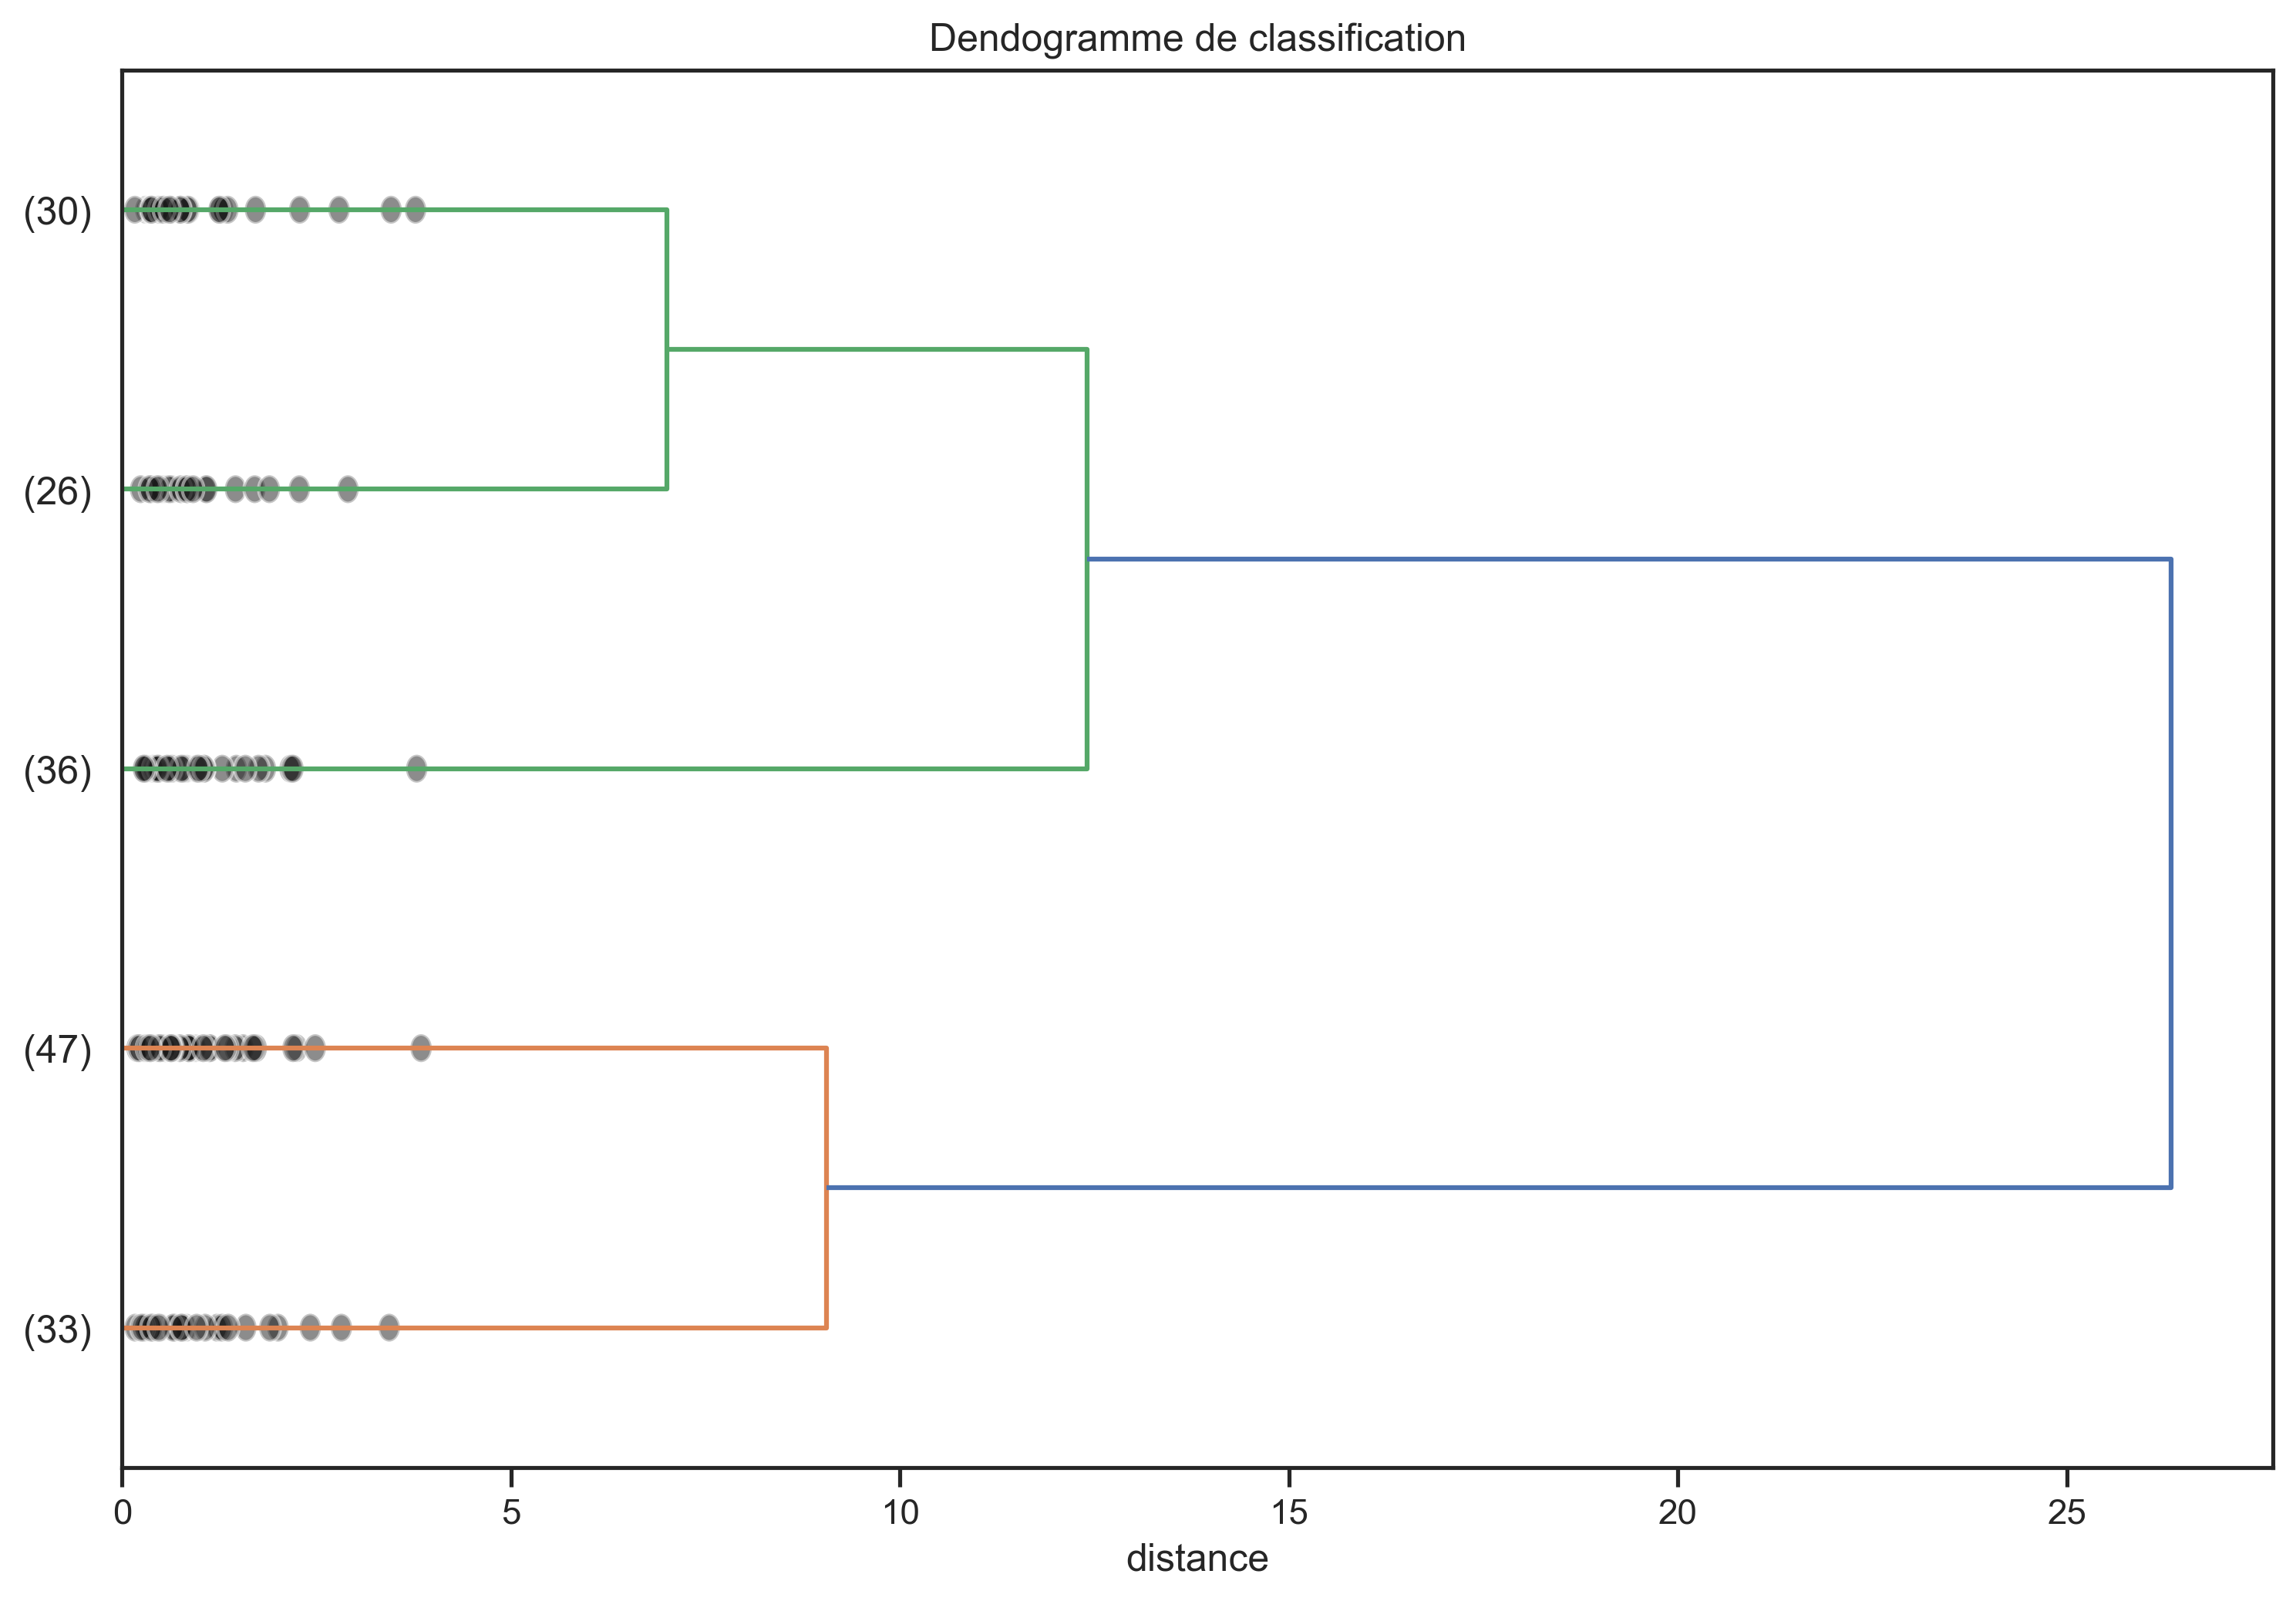

In [36]:
plt.figure(figsize=(12,8), dpi=300)
plt.title('Dendogramme de classification')
plt.xlabel('distance')
plt.grid(False)
dendrogram(
    Z,
    truncate_mode='lastp',
    p = 5,
    labels = pays,
    orientation = "right",
    show_contracted=True,
)
plt.show()

In [37]:
# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')

#index triés des groupes
idg = np.argsort(clusters)

# Comparaison des clusters trouvés avec les classification
df_groupe = pd.DataFrame(columns = ['Cluster','Zone'])
df_groupe["Zone"] = df_bilans_pays_clus.index[idg]
df_groupe["Cluster"] = clusters[idg]
df_groupe.head()

,Cluster,Zone
0,1,Pologne
1,1,Lituanie
2,1,Lettonie
3,1,Koweït
4,1,Suède


In [38]:
# Jointure pour ajout des groupes dans le dataframe principal
df_bilans_pays = pd.merge(df_bilans_pays, df_groupe, on="Zone")
df_bilans_pays.sample(5)

,Zone,Code zone,Année,Population,Evolution pop (%),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p),Cluster
79,Cambodge,115,2018,16249792.0,4.693,28.840,909580.0,24071.75,4
98,Mexique,138,2018,126190788.0,3.555,48.940,1152305.0,33397.50,2
147,Thaïlande,216,2018,69428453.0,1.039,42.708,1023460.0,23126.40,4
167,Belgique,255,2018,11482178.0,1.721,58.656,1375685.0,36452.55,1
128,Saint-Kitts-et-Nevis,188,2018,52441.0,2.418,64.231,942430.0,28123.25,5


In [39]:
df_bilans_pays.shape

(172, 9)

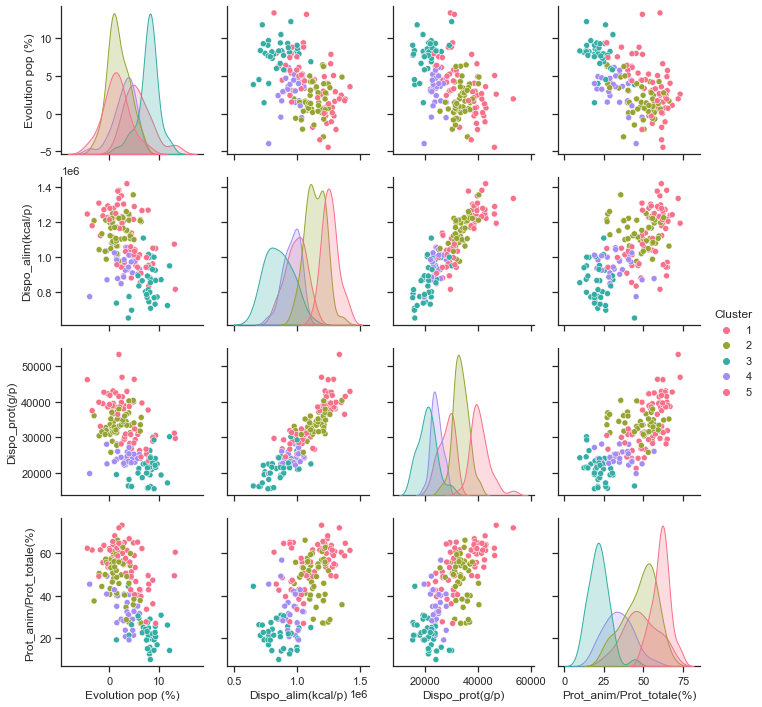

In [40]:
# Pairplot avec coloration des groupes
sns.set(style = 'ticks')
sns.pairplot(df_bilans_pays[["Evolution pop (%)", "Dispo_alim(kcal/p)",
                            "Dispo_prot(g/p)","Prot_anim/Prot_totale(%)", "Cluster"]],
             hue="Cluster", palette="husl")

In [41]:
df_bilans_pays_box = df_bilans_pays.sort_values("Cluster")

def boxplot_cluster(var):
    data_boxplot = []
    groupes_pays = df_bilans_pays_box["Cluster"].unique()
    
    for groupe in groupes_pays :
        subset = df_bilans_pays_box[df_bilans_pays_box.Cluster == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(8, 6))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5)

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title(("Distribution de " + var +" par Cluster"), fontsize=14)
    ax1.set_ylabel(var)
    ax1.set_xlabel("Cluster")
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

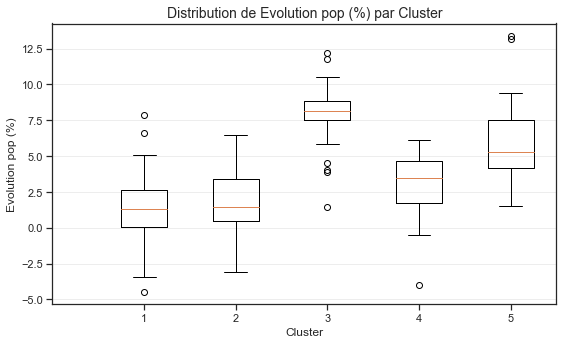

In [42]:
boxplot_cluster('Evolution pop (%)')

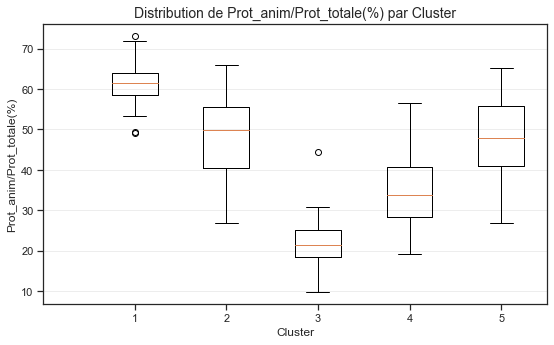

In [43]:
boxplot_cluster('Prot_anim/Prot_totale(%)')

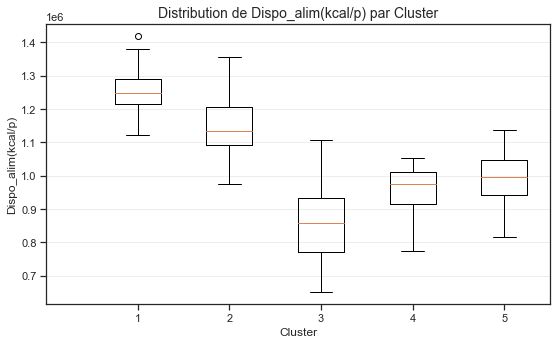

In [44]:
boxplot_cluster('Dispo_alim(kcal/p)')

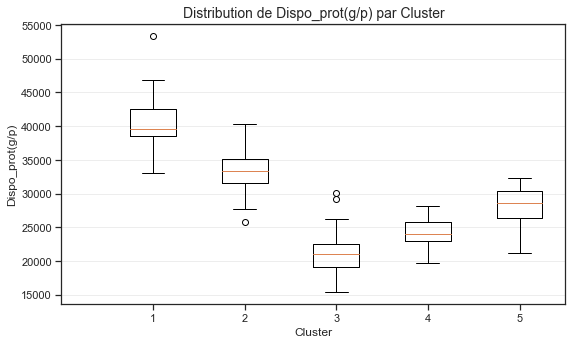

In [45]:
boxplot_cluster('Dispo_prot(g/p)')

Pour l'exportation des poulets, les pays les plus intéressants sont:

    - Une évolution importante de la population;
    - Une disponibilité alimentaire faible pour couvrir cette croissance;
    - Un ratio de protéines animales / protéines totales faible.

Les boxplots ci-dessus nous indiquent que les groupes 3 et 4 correspondent à ces indicateurs.

In [46]:
df_select_pays = df_bilans_pays[df_bilans_pays["Cluster"].isin([3,4])== True]
df_select_pays.head()

,Zone,Code zone,Année,Population,Evolution pop (%),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p),Cluster
1,Afghanistan,2,2018,37171921.0,8.015,19.434,744600.0,20264.80,3
4,Angola,7,2018,30809787.0,10.491,30.745,870525.0,19363.25,3
11,Bangladesh,16,2018,161376708.0,3.277,20.682,935495.0,22166.45,4
16,Îles Salomon,25,2018,652857.0,8.247,28.924,881475.0,19396.10,3
19,Cameroun,32,2018,25216267.0,8.232,15.663,997545.0,26239.85,3


In [47]:
df_select_pays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 166
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      62 non-null     object 
 1   Code zone                 62 non-null     int64  
 2   Année                     62 non-null     int64  
 3   Population                62 non-null     float64
 4   Evolution pop (%)         62 non-null     float64
 5   Prot_anim/Prot_totale(%)  62 non-null     float64
 6   Dispo_alim(kcal/p)        62 non-null     float64
 7   Dispo_prot(g/p)           62 non-null     float64
 8   Cluster                   62 non-null     int32  
dtypes: float64(5), int32(1), int64(2), object(1)
memory usage: 4.6+ KB


### Step 3 - Visualisez vos partitions dans le premier plan factoriel obtenu par ACP.

#### 1. Comparaison avec le Kmeans

Kmeans sur les données centrées réduites

In [48]:
from sklearn.cluster import KMeans
from sklearn import decomposition

In [49]:
# Nombre de clusters souhaités
n_clust = 5
# Clustering par K-means avec librairie sklearn sur les données centrées réduites
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

KMeans(n_clusters=5)

In [50]:
# Récupération des clusters attribués à chaque individu
clusters_km = km.labels_
clusters_km

array([2, 4, 3, 0, 4, 2, 3, 3, 3, 2, 2, 1, 1, 1, 3, 1, 4, 2, 2, 4, 3, 1,
       1, 1, 4, 2, 0, 2, 4, 2, 2, 2, 0, 4, 3, 2, 2, 2, 1, 0, 1, 3, 1, 3,
       3, 2, 1, 2, 1, 4, 3, 2, 1, 2, 3, 2, 1, 4, 2, 4, 1, 3, 2, 2, 3, 1,
       1, 0, 4, 3, 3, 3, 4, 2, 2, 2, 1, 0, 4, 1, 1, 3, 0, 3, 1, 1, 1, 4,
       3, 3, 4, 4, 2, 4, 0, 3, 0, 2, 2, 2, 0, 4, 1, 1, 1, 3, 2, 2, 1, 2,
       1, 4, 4, 3, 1, 2, 2, 1, 1, 1, 3, 3, 4, 4, 4, 3, 4, 3, 2, 2, 2, 1,
       0, 4, 4, 2, 2, 0, 3, 1, 4, 1, 3, 3, 0, 2, 4, 1, 4, 2, 0, 0, 0, 0,
       4, 3, 2, 3, 4, 2, 0, 1, 0, 4, 2, 4, 4, 3, 3, 2, 3, 4])

#### 2. ACP 

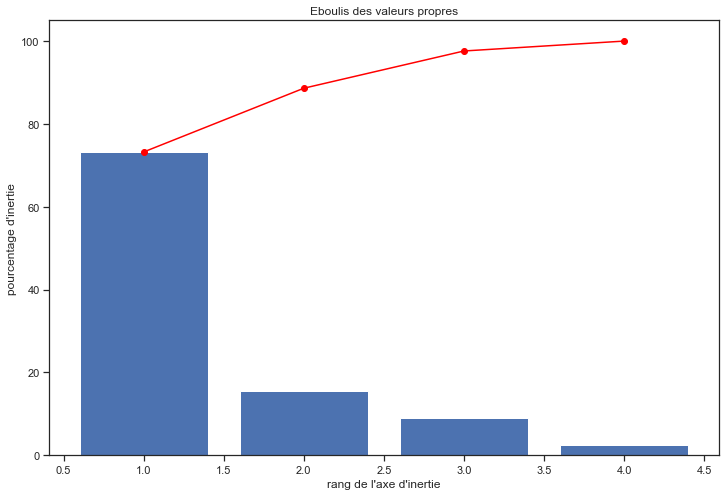

In [51]:
# Affichage du clustering par projection des individus sur les 2 plans factoriels.
pca = decomposition.PCA().fit(X_scaled) #sklearn
X_projected = pca.transform(X_scaled)

# Eboulis des valeurs propres
varexpl = pca.explained_variance_ratio_*100
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)
plt.plot(np.arange(len(varexpl))+1, varexpl.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [52]:
print(varexpl)

[73.22517945 15.39386397  8.99165341  2.38930318]


On remarque ici que l'inertie totale sur le premier plan factoriel (F1 et F2) est égale à 88% (73 + 15). Une analyse sur ce premier plan factoriel sera donc satisfaisante.

#### 3. ACP - Cercles des corrélations

In [53]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

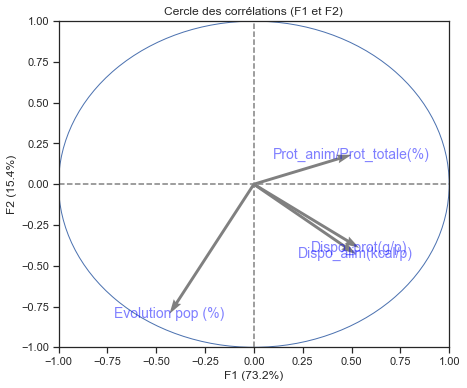

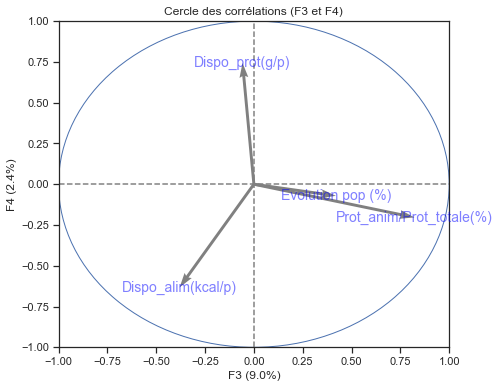

In [54]:
pcs = pca.components_
display_circles(pcs, 4, pca, [(0,1),(2,3)], labels = np.array(df_bilans_pays_clus.columns))

Les variables les plus corrélées à F1 sont la disponibilité en protéines, la disponibilité en Kcal (qui sont d'ailleurs très fortement corrélées entre elles) et le ratio de protéines animales sur les protéines totales. La composante principale F1 (variable synthétique) représente donc bien le bilan énergétique. Pour la composante F2, l'évolution de la population est anti-corrélée à la proportion protéines animales / protéines totales. Cet axe peut donc représenter les données démographiques.

On peut d'ailleurs calculer les valeurs de ces variables synthétiques F1, F2, F3 et F4 qui pourraient remplacer les autres variables :


In [55]:
df_var_syn = pd.DataFrame(X_projected, index=df_bilans_pays['Zone'], columns=["F"+str(i+1) for i in range(4)])
df_var_syn.head()

,F1,F2,F3,F4
Zone,,,,
Arménie,1.002597,0.395616,-0.230584,0.266113
Afghanistan,-2.895549,0.072888,0.060771,0.425455
Albanie,2.288248,-0.022772,-0.461407,0.484689
Algérie,-0.027341,-1.339922,-0.935087,-0.116813
Angola,-2.515970,-0.644359,0.663596,-0.339553


#### 4.Projection sur les plans factoriels

In [56]:
# Affichage sur plusieurs plans factoriels avec inertie des axes.
def plot_plans_factoriels(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, centroid=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,8))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # Affichage des positions des centres de classes
            if centroid is not None:
                centroids = km.cluster_centers_
                centroids_projected = pca.transform(centroids)
                for j,(x1,y1) in enumerate(centroids_projected[:,[d1,d2]]):
                    plt.scatter(x1,y1, c = 'red', marker='x', s=100, label="Centroides")
            
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des {} individus sur F{} et F{}".format(X_projected.shape[0], d1+1, d2+1), fontsize=22)
            plt.show(block=False)

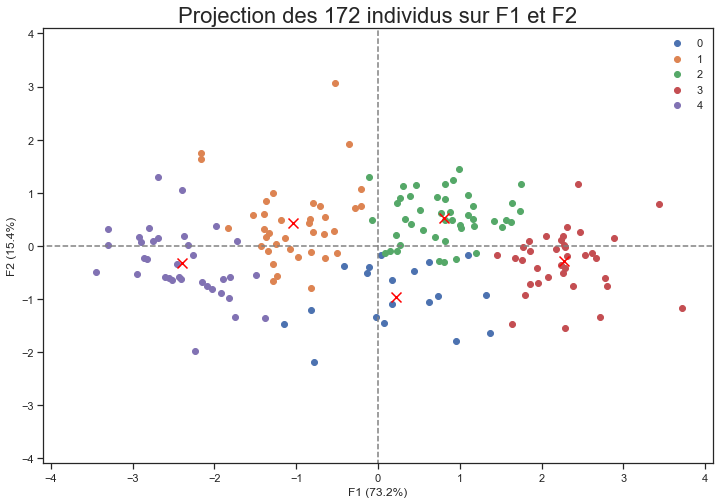

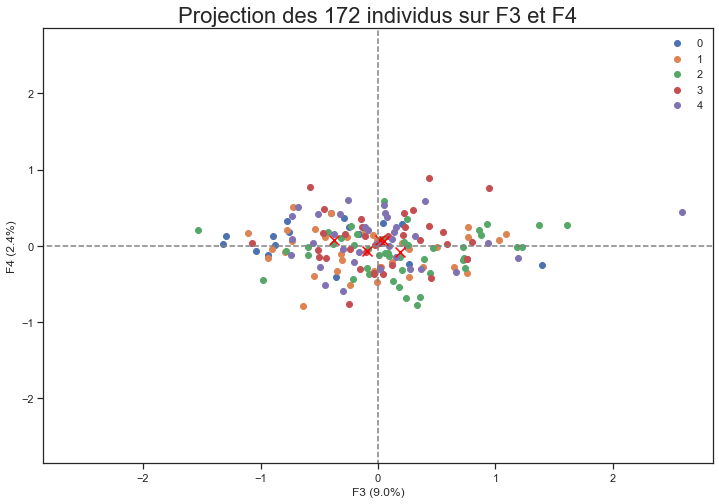

In [57]:
plot_plans_factoriels(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var = clusters_km, centroid=1)

#### 5. Méthode des centres mobiles (aide à la détection du meilleur K)

In [58]:
#librairie pour évaluation des partitions
from sklearn import metrics

In [59]:
#faire varier le nombre de clusters de 2 à 15 avec la méthode des silhouettes
res = np.arange ( 14, dtype ="double" )
for k in np.arange(14):
    kms = KMeans(n_clusters = k+2)
    kms.fit(X_scaled)
    res[k] = metrics.silhouette_score(X_scaled, kms.labels_)
print(res)

[0.44315501 0.32950272 0.28003081 0.29011678 0.28511183 0.26778898
 0.27160986 0.24921119 0.25476259 0.24041863 0.24040734 0.24541742
 0.24849829 0.24697016]


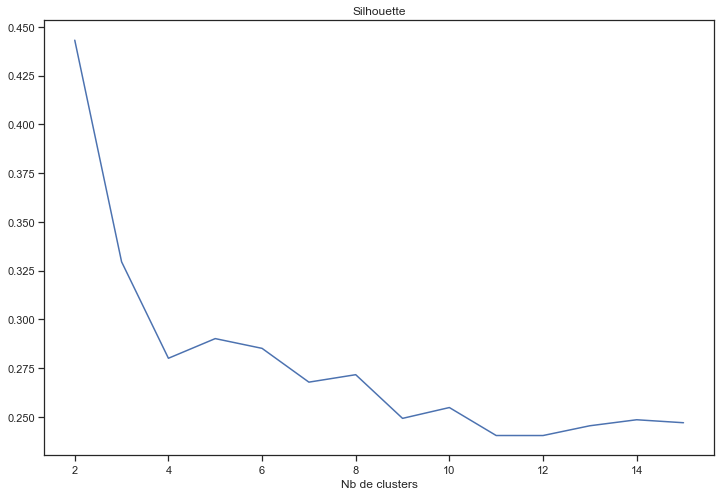

In [60]:
plt.figure(figsize=(12,8))
plt.title("Silhouette")
plt.xlabel("Nb de clusters")
plt.plot(np.arange(2,16,1), res)
plt.show()

On remarque que le nombre de 5 Clusters n'est pas idéal pour le Kmeans. La meilleure alternative serait 2 Clusters. Si l'on veut partitionner un peu plus, il faudrait considérer un K = 3 ou 4.

#### 6.Interprétation des Clusters

In [61]:
#correspondance avec les groupes de la CAH
pd.crosstab(clusters,km.labels_)

col_0,0,1,2,3,4
row_0,,,,,
1,1,0,1,31,0
2,12,0,30,5,0
3,0,4,0,0,32
4,0,24,2,0,0
5,6,9,12,0,3


On remarque que les groupes de la CAH sont bien répartis comparativement aux groupes du Kmeans avec tout de même quelques différences.

In [62]:
df_bilans_pays['Clusterkm'] = clusters_km

In [63]:
# effectifs conditionnel sur Kmeans
gb = df_bilans_pays.groupby('Clusterkm')
nk = gb.size()
print(nk)

Clusterkm
0    19
1    37
2    45
3    36
4    35
dtype: int64


In [64]:
# Moyennes conditionnelles
mk = gb.mean()
mk = mk[["Evolution pop (%)", "Dispo_alim(kcal/p)","Dispo_prot(g/p)","Prot_anim/Prot_totale(%)"]]
mk

,Evolution pop (%),Dispo_alim(kcal/p),Dispo_prot(g/p),Prot_anim/Prot_totale(%)
Clusterkm,,,,
0,5.628579,1.150807e+06,34261.397368,36.631947
1,4.113000,9.412857e+05,24049.356757,34.896297
2,1.512533,1.077496e+06,31062.797778,53.388156
3,1.336194,1.257466e+06,40387.047222,60.551722
4,8.398686,8.547361e+05,21534.582857,22.752229


Boxplots sur les variables et variables synthétiques.

In [65]:
# Ajout des variables synthétiques F1 et F2
df_bilans_pays_boxkm = pd.merge(df_bilans_pays, df_var_syn, on="Zone", how="left")
df_bilans_pays_boxkm = df_bilans_pays_boxkm.sort_values("Clusterkm")
df_bilans_pays_boxkm.head()

,Zone,Code zone,Année,Population,Evolution pop (%),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p),Cluster,Clusterkm,F1,F2,F3,F4
100,Maroc,143,2018,36029093.0,3.939,27.493,1245380.0,36894.20,2,0,0.627959,-1.053148,-1.292280,0.131111
77,Kirghizistan,113,2018,6304030.0,5.788,40.173,996085.0,30809.65,5,0,-0.421643,-0.375078,0.206120,0.283130
32,Azerbaïdjan,52,2018,9949537.0,3.396,34.452,1149385.0,34463.30,2,0,0.439207,-0.476390,-0.759087,0.180100
132,Arabie saoudite,194,2018,33702756.0,6.259,37.658,1207055.0,31733.10,2,0,0.170194,-1.103738,-0.358067,-0.408396
137,Afrique du Sud,202,2018,57792518.0,4.344,42.705,1058135.0,30795.05,5,0,0.032126,-0.174873,0.020115,0.042071


In [66]:
def boxplot_cluster_km(var):
    data_boxplot = []
    groupes_pays = df_bilans_pays_boxkm["Clusterkm"].unique()
    
    for groupe in groupes_pays :
        subset = df_bilans_pays_boxkm[df_bilans_pays_boxkm.Clusterkm == groupe]
        data_boxplot.append(subset[var])

    fig, ax1 = plt.subplots(figsize=(12, 8))
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data_boxplot, notch=0, vert=1, whis=1.5, labels=["0", "1", "2", "3", "4"])

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.4)
    ax1.set_axisbelow(True)
    ax1.set_title(("Distribution de " + var +" par Cluster Kmeans"), fontsize=22)
    ax1.set_ylabel(var)
    ax1.set_xlabel("Cluster")
    ax1.set_xlim(0, len(data_boxplot) + 0.5)

    plt.show()

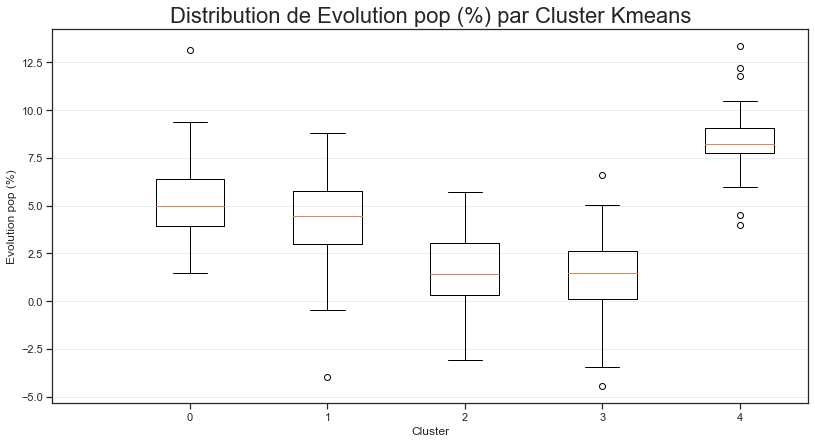

In [67]:
boxplot_cluster_km('Evolution pop (%)')

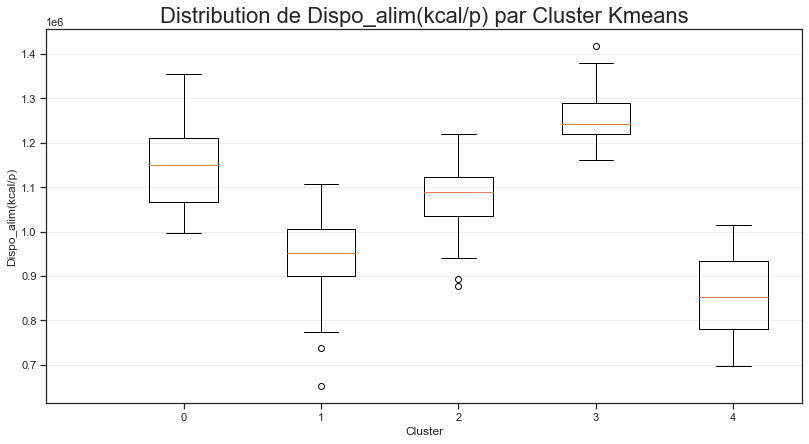

In [68]:
boxplot_cluster_km('Dispo_alim(kcal/p)')

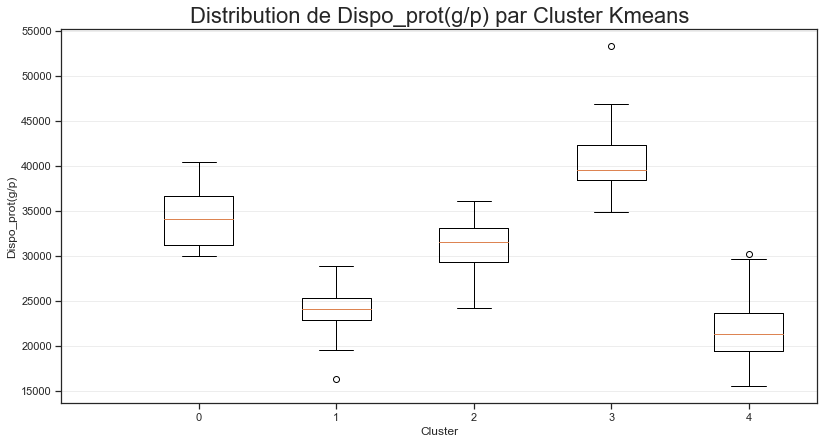

In [69]:
boxplot_cluster_km('Dispo_prot(g/p)')

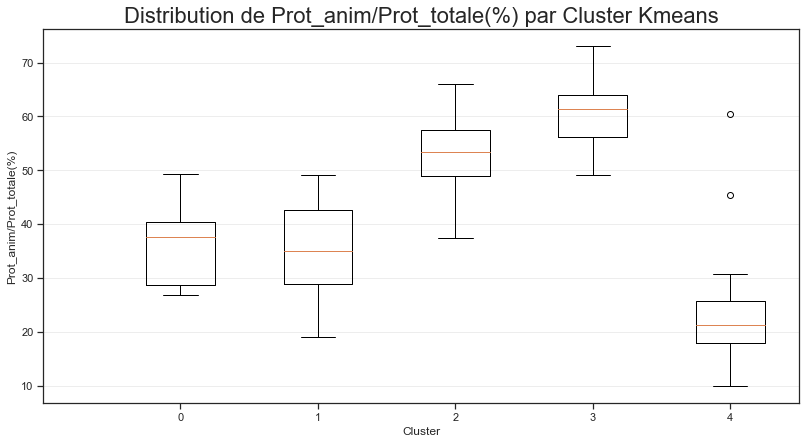

In [70]:
boxplot_cluster_km('Prot_anim/Prot_totale(%)')

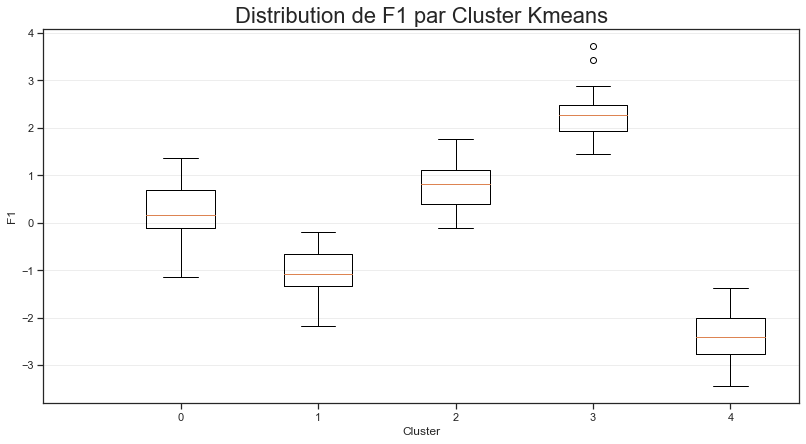

In [71]:
boxplot_cluster_km('F1')

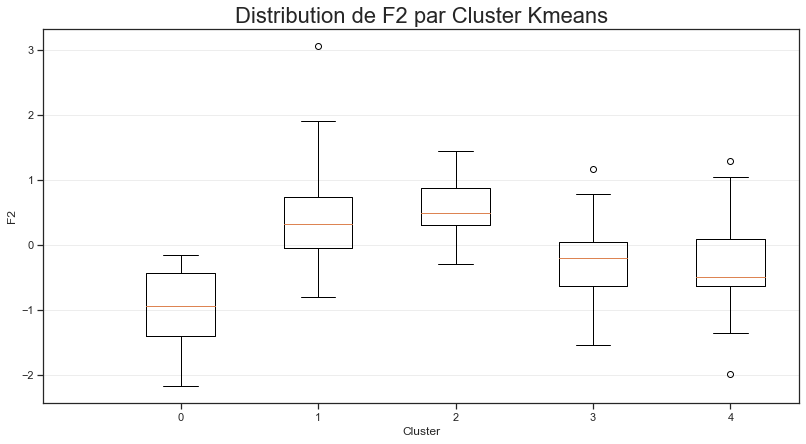

In [72]:
boxplot_cluster_km('F2')

En se basant sur les mêmes critères que lors de la sélection des pays par CAH (évolution importante de la population et bilan alimentaire trop faible), les clusters Kmeans à selectionner sont ceux dont le F1 est inférieur à -1, soit : 

In [73]:
select_clusters_kmeans = df_bilans_pays_boxkm.groupby("Clusterkm").mean().reset_index()
select_clusters_kmeans = select_clusters_kmeans[select_clusters_kmeans["F1"]<-1]["Clusterkm"].unique()
select_clusters_kmeans

array([1, 4], dtype=int64)

In [74]:
df_select_pays_kmeans = df_bilans_pays[df_bilans_pays["Clusterkm"].isin(select_clusters_kmeans)]
df_select_pays_kmeans.head()

,Zone,Code zone,Année,Population,Evolution pop (%),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p),Cluster,Clusterkm
1,Afghanistan,2,2018,37171921.0,8.015,19.434,744600.0,20264.80,3,4
4,Angola,7,2018,30809787.0,10.491,30.745,870525.0,19363.25,3,4
11,Bangladesh,16,2018,161376708.0,3.277,20.682,935495.0,22166.45,4,1
12,Bolivie (État plurinational de),19,2018,11353142.0,4.447,48.416,880380.0,26732.60,5,1
13,Botswana,20,2018,2254068.0,6.288,42.525,854830.0,24049.85,5,1


### Step 4 - Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :



- un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale;

- un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

#### 1.un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes, trouvez une variable dont la loi est normale;

In [75]:
df_select_pays_kmeans.head()

,Zone,Code zone,Année,Population,Evolution pop (%),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p),Cluster,Clusterkm
1,Afghanistan,2,2018,37171921.0,8.015,19.434,744600.0,20264.80,3,4
4,Angola,7,2018,30809787.0,10.491,30.745,870525.0,19363.25,3,4
11,Bangladesh,16,2018,161376708.0,3.277,20.682,935495.0,22166.45,4,1
12,Bolivie (État plurinational de),19,2018,11353142.0,4.447,48.416,880380.0,26732.60,5,1
13,Botswana,20,2018,2254068.0,6.288,42.525,854830.0,24049.85,5,1


In [76]:
liste_var = ["Evolution pop (%)","Prot_anim/Prot_totale(%)","Dispo_alim(kcal/p)","Dispo_prot(g/p)"]

In [77]:
import scipy.stats as scs

In [78]:
def var_hist(var, i):
    subset = df_select_pays_kmeans[var]
    n_dataset = len(df_select_pays_kmeans)
    xbar = np.mean(df_select_pays_kmeans[var]) # Moyenne
    sprime = np.std(df_select_pays_kmeans[var], ddof=1) # Ecart-type
    sprime2 = np.var(df_select_pays_kmeans[var], ddof=1) #Variance non biaisée
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(df_select_pays_kmeans[var].min(),df_select_pays_kmeans[var].max(),1)
    y = scs.norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18)

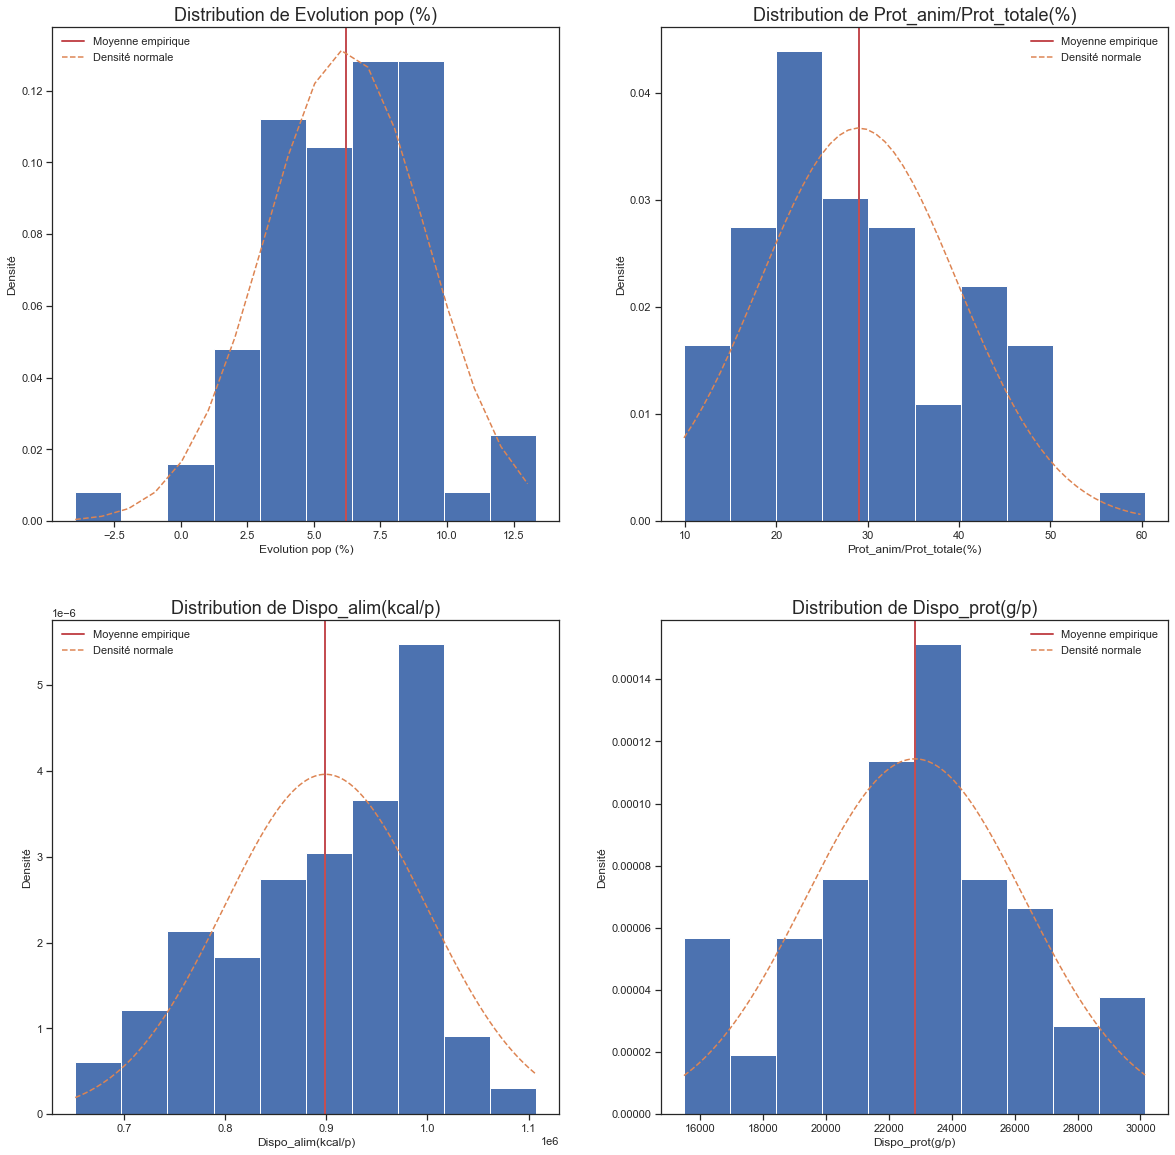

In [79]:
fig = plt.figure(figsize=(20,20),constrained_layout=False)
i = 221
for var in liste_var:
    var_hist(var, i)
    i+=1

In [80]:
# Test de Shapiro
for var in liste_var :
    print(var, ": Pvalue = ", scs.shapiro(df_select_pays_kmeans[var])[1])

Evolution pop (%) : Pvalue =  0.0823936015367508
Prot_anim/Prot_totale(%) : Pvalue =  0.021929871290922165
Dispo_alim(kcal/p) : Pvalue =  0.055985644459724426
Dispo_prot(g/p) : Pvalue =  0.24572686851024628


In [81]:
# Test de Kolmogorov Smirnov
for var in liste_var :
     print(var,":",scs.ks_2samp(df_select_pays_kmeans[var],
                                list(np.random.normal(np.mean(df_select_pays_kmeans[var]), 
                                                      np.std(df_select_pays_kmeans[var]), 10))))

Evolution pop (%) : KstestResult(statistic=0.30277777777777776, pvalue=0.32857884203019294)
Prot_anim/Prot_totale(%) : KstestResult(statistic=0.38333333333333336, pvalue=0.11420571391398249)
Dispo_alim(kcal/p) : KstestResult(statistic=0.2777777777777778, pvalue=0.42659289406870315)
Dispo_prot(g/p) : KstestResult(statistic=0.2361111111111111, pvalue=0.6265650806799563)


Pour les 2 tests cette fois, les Pvalue ne permettent pas de rejeter l'hypothèse de normalité sur la variable Disponibilité alimentaire en kcal/p. Nous allons donc utiliser cette variable pour réaliser les tests de comparaison de 2 populations dans le cas gaussien.

#### 2.un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison.

In [85]:
df_bilans_pays_boxkm.head()

,Zone,Code zone,Année,Population,Evolution pop (%),Prot_anim/Prot_totale(%),Dispo_alim(kcal/p),Dispo_prot(g/p),Cluster,Clusterkm,F1,F2,F3,F4
100,Maroc,143,2018,36029093.0,3.939,27.493,1245380.0,36894.20,2,0,0.627959,-1.053148,-1.292280,0.131111
77,Kirghizistan,113,2018,6304030.0,5.788,40.173,996085.0,30809.65,5,0,-0.421643,-0.375078,0.206120,0.283130
32,Azerbaïdjan,52,2018,9949537.0,3.396,34.452,1149385.0,34463.30,2,0,0.439207,-0.476390,-0.759087,0.180100
132,Arabie saoudite,194,2018,33702756.0,6.259,37.658,1207055.0,31733.10,2,0,0.170194,-1.103738,-0.358067,-0.408396
137,Afrique du Sud,202,2018,57792518.0,4.344,42.705,1058135.0,30795.05,5,0,0.032126,-0.174873,0.020115,0.042071


In [86]:
df_bilans_pays_boxkm = df_bilans_pays_boxkm[["Zone","Clusterkm","Dispo_alim(kcal/p)"]]
df_bilans_pays_boxkm.sample(10)

,Zone,Clusterkm,Dispo_alim(kcal/p)
108,Vanuatu,1,951555.0
131,Sao Tomé-et-Principe,1,892790.0
124,Zimbabwe,4,696420.0
17,Bulgarie,2,1041710.0
9,Bahamas,2,969075.0
146,République-Unie de Tanzanie,4,866145.0
76,Jordanie,1,997180.0
126,Rwanda,4,798620.0
25,Chili,2,1105585.0
82,Koweït,0,1266915.0


Nous allons choisir 2 Clusters pour le test de comparaison sur la variable Dispo_alim(kcal/p) : Les groupes 1 et 4 qui ont des effectifs proches.

In [88]:
df_bilans_pays_boxkm = df_bilans_pays_boxkm[df_bilans_pays_boxkm["Clusterkm"].isin([1,4])]
df_bilans_pays_boxkm_1 = df_bilans_pays_boxkm[df_bilans_pays_boxkm["Clusterkm"] == 1]
df_bilans_pays_boxkm_4 = df_bilans_pays_boxkm[df_bilans_pays_boxkm["Clusterkm"] == 4]

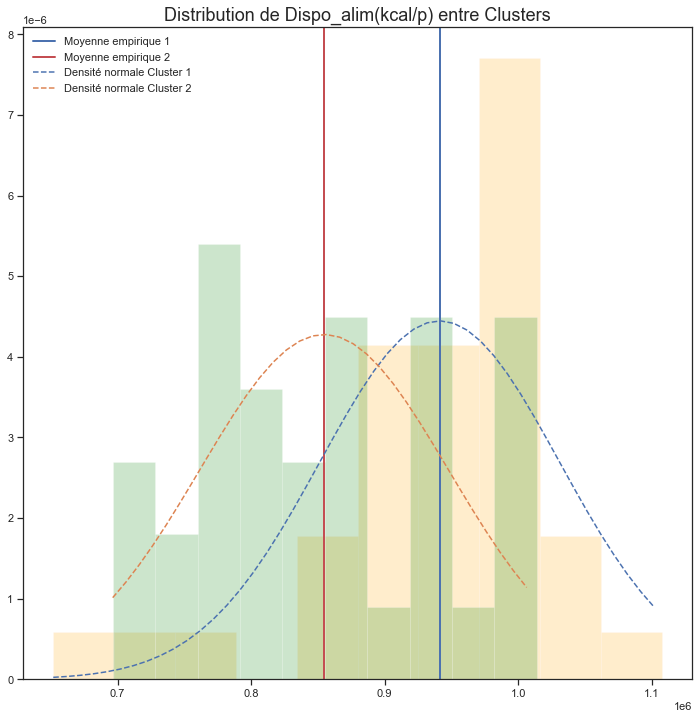

In [90]:
var = "Dispo_alim(kcal/p)"
xbar_1 = np.mean(df_bilans_pays_boxkm_1[var]) # Moyenne
sprime_1 = np.std(df_bilans_pays_boxkm_1[var], ddof=1) # Ecart-type
sprime2_1 = np.var(df_bilans_pays_boxkm_1[var], ddof=1) #Variance non biaisée
xbar_4 = np.mean(df_bilans_pays_boxkm_4[var]) # Moyenne
sprime_4 = np.std(df_bilans_pays_boxkm_4[var], ddof=1) # Ecart-type
sprime2_4 = np.var(df_bilans_pays_boxkm_4[var], ddof=1) #Variance non biaisée

fig = plt.figure(figsize=(12,12))
plt.hist(df_bilans_pays_boxkm_1[var], density=True, alpha=0.2, color="orange")
plt.hist(df_bilans_pays_boxkm_4[var], density=True, alpha=0.2, color="green")
plt.axvline(xbar_1, color='b', linewidth=2, label="Moyenne empirique 1")
plt.axvline(xbar_4, color='r', linewidth=2, label="Moyenne empirique 2")
bins_1 = np.arange(df_bilans_pays_boxkm_1[var].min(),df_bilans_pays_boxkm_1[var].max(),10000)
y_1 = scs.norm.pdf(bins_1, xbar_1, sprime_1)
plt.plot(bins_1, y_1, '--', label="Densité normale Cluster 1")
bins_4 = np.arange(df_bilans_pays_boxkm_4[var].min(),df_bilans_pays_boxkm_4[var].max(),10000)
y_4 = scs.norm.pdf(bins_4, xbar_4, sprime_4)
plt.plot(bins_4, y_4, '--', label="Densité normale Cluster 2")

plt.legend()
plt.title('Distribution de '+str(var)+' entre Clusters', fontsize=18)

plt.show()

Nous allons dans un premier temps tester l'égalité des variances :

In [91]:
scs.bartlett(df_bilans_pays_boxkm_1[var],df_bilans_pays_boxkm_4[var])

BartlettResult(statistic=0.05179039476490958, pvalue=0.8199766329529208)

La Pvalue valant 0.82, on ne rejette donc pas l’égalité des variances au niveau de test 5%.

Testons ensuite l'égalité des moyennes :

In [92]:
scs.ttest_ind(df_bilans_pays_boxkm_1[var],df_bilans_pays_boxkm_4[var], equal_var=True)

Ttest_indResult(statistic=4.01339775912917, pvalue=0.00014814923195582755)

On obtient une Pvalue égale à environ 0.00015. On constate donc que l’hypothèse d’égalité des moyennes de disponibilité alimentaire en kcal/p entre les différents Clusters est largement rejetée à un niveau de test de 5%.